# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

number = -1
skip = 0
city_name=[]
temp =[]
cloud=[]
country=[]
date=[]
hum=[]
latitude=[]
long=[]
wind=[]
num =[]
print("Beginning of data collection")
print("--------------------------------")
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        number+=1
        num.append(number)
        print("Processing record  " +str(number+1)+ " and " + str(skip) + " skipped" + "|" + response['name'])
    except KeyError:
        skip+=1
        print(f"City was not found. Skiping... ")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
weather_dic = {
    "City ID": num,"City": city_name, "Cloudiness":cloud, "Country":country, "Date": date, 
    "Humidity": hum, "Lat":latitude, "Lng":long, "Max Temp": temp,"Wind Speed": wind  
}

Beginning of data collection
--------------------------------
Processing record  1 and 0 skipped|East London
Processing record  2 and 0 skipped|Albany
Processing record  3 and 0 skipped|Lüderitz
Processing record  4 and 0 skipped|La Ronge
Processing record  5 and 0 skipped|Naze
Processing record  6 and 0 skipped|Funadhoo
City was not found. Skiping... 
Processing record  7 and 1 skipped|Hithadhoo
Processing record  8 and 1 skipped|Challans
Processing record  9 and 1 skipped|Busselton
Processing record  10 and 1 skipped|Sitka
Processing record  11 and 1 skipped|Cape Town
Processing record  12 and 1 skipped|Jamestown
Processing record  13 and 1 skipped|Qaanaaq
Processing record  14 and 1 skipped|Port Macquarie
Processing record  15 and 1 skipped|Puerto Ayora
Processing record  16 and 1 skipped|Agüimes
Processing record  17 and 1 skipped|Coamo
Processing record  18 and 1 skipped|Aykhal
Processing record  19 and 1 skipped|Luba
Processing record  20 and 1 skipped|Evensk
Processing record  2

Processing record  166 and 18 skipped|Zhigansk
Processing record  167 and 18 skipped|Bredasdorp
Processing record  168 and 18 skipped|Delta
Processing record  169 and 18 skipped|Meulaboh
Processing record  170 and 18 skipped|Jieshi
Processing record  171 and 18 skipped|Yellowknife
Processing record  172 and 18 skipped|Souillac
City was not found. Skiping... 
Processing record  173 and 19 skipped|Borzoy
Processing record  174 and 19 skipped|Poum
Processing record  175 and 19 skipped|Clyde River
Processing record  176 and 19 skipped|Seminole
Processing record  177 and 19 skipped|Rocha
Processing record  178 and 19 skipped|Roald
Processing record  179 and 19 skipped|Grand Gaube
Processing record  180 and 19 skipped|Inhambane
Processing record  181 and 19 skipped|Bagdarin
Processing record  182 and 19 skipped|Agadez
Processing record  183 and 19 skipped|Jaciara
Processing record  184 and 19 skipped|Xicoténcatl
Processing record  185 and 19 skipped|Gresham
Processing record  186 and 19 skip

Processing record  332 and 30 skipped|Labuhan
Processing record  333 and 30 skipped|Dwārka
Processing record  334 and 30 skipped|Qaqortoq
Processing record  335 and 30 skipped|Padang
Processing record  336 and 30 skipped|Aswān
Processing record  337 and 30 skipped|Coos Bay
Processing record  338 and 30 skipped|Tigil'
Processing record  339 and 30 skipped|Bud
Processing record  340 and 30 skipped|Aksarka
City was not found. Skiping... 
City was not found. Skiping... 
Processing record  341 and 32 skipped|Río Gallegos
Processing record  342 and 32 skipped|Bac Lieu
Processing record  343 and 32 skipped|Tual
Processing record  344 and 32 skipped|Bad Hofgastein
City was not found. Skiping... 
Processing record  345 and 33 skipped|Dūngarpur
Processing record  346 and 33 skipped|Khorinsk
City was not found. Skiping... 
Processing record  347 and 34 skipped|Lakatoro
Processing record  348 and 34 skipped|Taber
Processing record  349 and 34 skipped|Tetela de Ocampo
Processing record  350 and 34 

City was not found. Skiping... 
Processing record  493 and 52 skipped|Kandi
City was not found. Skiping... 
Processing record  494 and 53 skipped|Fort Nelson
Processing record  495 and 53 skipped|Mācherla
Processing record  496 and 53 skipped|Bystřice nad Pernštejnem
Processing record  497 and 53 skipped|Grammichele
Processing record  498 and 53 skipped|Golyshmanovo
Processing record  499 and 53 skipped|Huarmey
City was not found. Skiping... 
City was not found. Skiping... 
Processing record  500 and 55 skipped|Sindor
Processing record  501 and 55 skipped|Tigzirt
Processing record  502 and 55 skipped|Manta
Processing record  503 and 55 skipped|Āsosa
City was not found. Skiping... 
Processing record  504 and 56 skipped|Taltal
Processing record  505 and 56 skipped|Beya
Processing record  506 and 56 skipped|Cockburn Town
Processing record  507 and 56 skipped|Mitsamiouli
Processing record  508 and 56 skipped|Amapá
Processing record  509 and 56 skipped|Lumeje
Processing record  510 and 56 s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert raw data to data frame and export to csv
weather_dat = pd.DataFrame(weather_dic)
weather_dat.to_csv(r'../output_data/cities.csv',index=False, header=True)

In [5]:
#Call csv in order to avoid excess api usage and time for data collection
csv = '../output_data/cities.csv'
weather_data = pd.read_csv(csv)
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,East London,0,ZA,1592407654,59,-33.02,27.91,19.00,5.70
1,1,Albany,0,US,1592407857,42,42.60,-73.97,26.67,1.33
2,2,Lüderitz,0,NaN,1592407857,10,-26.65,15.16,31.00,3.60
3,3,La Ronge,90,CA,1592407858,87,55.10,-105.28,8.00,6.20
4,4,Naze,98,JP,1592407858,100,28.37,129.48,26.00,3.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

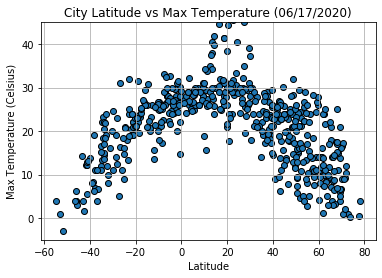

In [6]:
# Build a scatter plot for Latitude vs. Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black")

# Create a timestamp for today
today_date = pd.Timestamp("today").strftime("%m/%d/%Y")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({today_date})")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.ylim(-5, 45)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature.png")


##### Here we can see the highest temperature around equator line, which is 0 Latitude.

#### Latitude vs. Humidity Plot

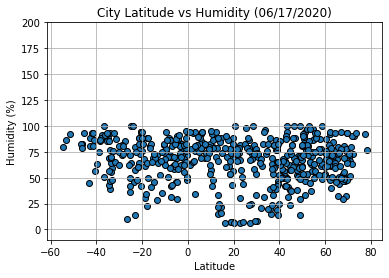

In [7]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({today_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 200)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

##### In this graph we can see less humid zones around -20 Latitude and 20-40 Latitude

#### Latitude vs. Cloudiness Plot

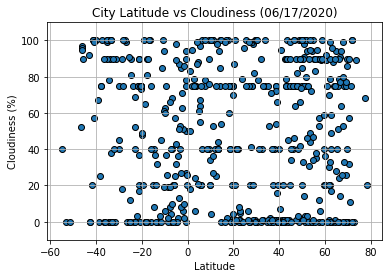

In [8]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha=1, edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({today_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 110)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

##### For current dataset cities around -40 Latitude have less cloudiness 

#### Latitude vs. Wind Speed Plot

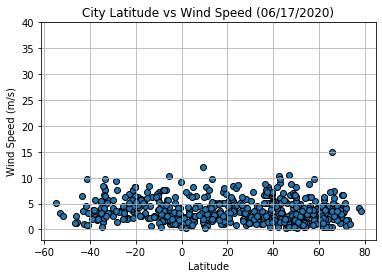

In [9]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({today_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylim(-2, 40)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed.png")

##### This dataset shows the same wind speed data around latitude.

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
reg_line = ""
def regress(x, y):   
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regress_values = x*slope + intercept
    global reg_line
    reg_line="y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    plt.plot(x, regress_values, "r-", label = "Regression")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
weather_data
nothern_hem = weather_data.loc[weather_data["Lat"] >= 0, :]
southern_hem = weather_data.loc[weather_data["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

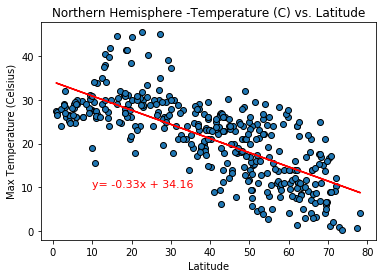

y= -0.33x + 34.16


In [21]:
# Build a scatter plot for Northern Hemisphere -Temperature (C) vs. Latitude
plt.scatter(nothern_hem["Lat"], nothern_hem["Max Temp"], marker="o", edgecolors="black")
plt.title("Northern Hemisphere -Temperature (C) vs. Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
# Add linear regression
regress(nothern_hem['Lat'],nothern_hem['Max Temp'])
plt.annotate(reg_line, (10, 10), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/NortHem_Temp_Lat.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

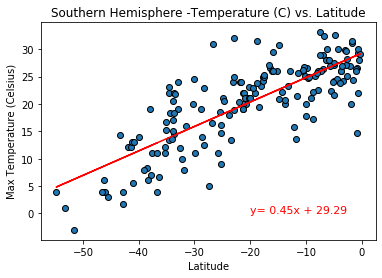

In [23]:
# Build a scatter plot for Southern Hemisphere -Temperature (C) vs. Latitude
plt.scatter(southern_hem["Lat"], southern_hem["Max Temp"], marker="o", edgecolors="black")
plt.ylabel("Max Temperature (Celsius)")
plt.title("Southern Hemisphere -Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(southern_hem['Lat'],southern_hem['Max Temp'])
plt.annotate(reg_line,(-20, 0), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/SouthHem_Temp_Lat.png")
plt.show()

##### We can observe temperature increase as we get closer to equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

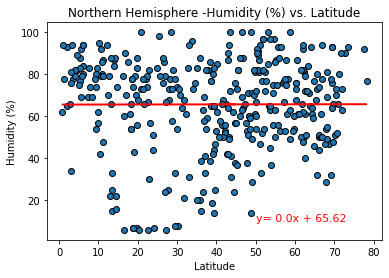

In [25]:
# Build a scatter plot for Northern Hemisphere - Humidity (%) vs. Latitude
plt.scatter(nothern_hem["Lat"], nothern_hem["Humidity"], marker="o", edgecolors="black")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere -Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(nothern_hem['Lat'],nothern_hem['Humidity'])
plt.annotate(reg_line,(50, 10), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/NorthHem_Hum_Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

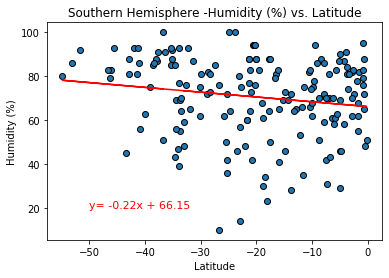

In [26]:
# Build a scatter plot for Southern Hemisphere - Humidity (%) vs. Latitude
plt.scatter(southern_hem["Lat"], southern_hem["Humidity"], marker="o", edgecolors="black")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere -Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(southern_hem['Lat'],southern_hem['Humidity'])
plt.annotate(reg_line,(-50, 20), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/SouthHem_Hum_Lat.png")
plt.show()

##### Current dataset shows slight increase in humidity by getting closer to equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

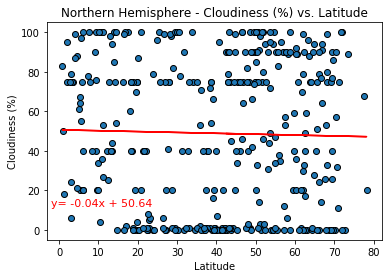

In [28]:
# Build a scatter plot for Northern Hemisphere - Cloudiness (%) vs. Latitude
plt.scatter(nothern_hem["Lat"], nothern_hem["Cloudiness"], marker="o", edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(nothern_hem["Lat"], nothern_hem["Cloudiness"])
plt.annotate(reg_line,(-2, 12), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/NorthHem_Cloud_Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

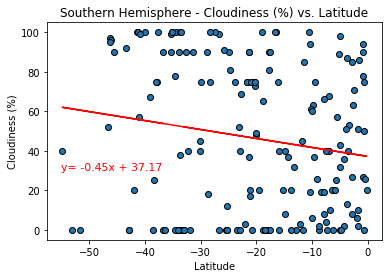

In [29]:
# Build a scatter plot for Southern Hemisphere - Cloudiness (%) vs. Latitude
plt.scatter(southern_hem["Lat"], southern_hem["Cloudiness"], marker="o", edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(southern_hem["Lat"], southern_hem["Cloudiness"])
plt.annotate(reg_line,(-55, 30), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/SouthHem_Cloud_Lat.png")
plt.show()

##### Current dataset doesn't show correct information around equator.

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression


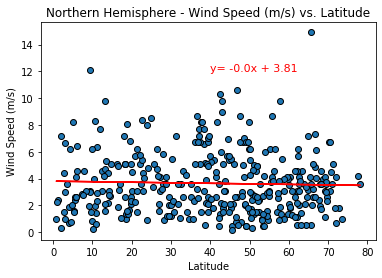

In [31]:
# Build a scatter plot for Northern Hemisphere - Wind Speed (m/s) vs. Latitude
plt.scatter(nothern_hem["Lat"], nothern_hem["Wind Speed"], marker="o", edgecolors="black")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere - Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(nothern_hem["Lat"], nothern_hem["Wind Speed"])
plt.annotate(reg_line,(40, 12), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/NorthHem_wind_Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

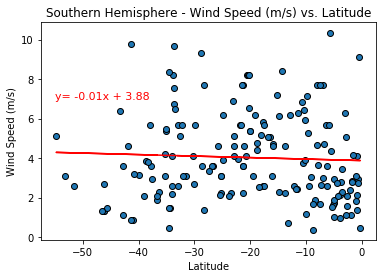

In [33]:
# Build a scatter plot for Southern Hemisphere - Wind Speed (m/s) vs. Latitude
plt.scatter(southern_hem["Lat"], southern_hem["Wind Speed"], marker="o", edgecolors="black")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Wind Speed (m/s) vs. Latitude")
plt.xlabel("Latitude")
# Add linear regression
regress(southern_hem["Lat"], southern_hem["Wind Speed"])
plt.annotate(reg_line,(-55, 7), fontsize=11, color="red")
# Save the figure
plt.savefig("../output_data/SouthHem_wind_Lat.png")
plt.show()

##### There are no crucial relationship between humidity, cloudness and wind speed vs. Latitude